## Solving Evolution of Orbital Parameters of Eccentric, Charged, Binary Black Hole at Lowest Order

In [168]:
%matplotlib inline
from numpy import log,pi,exp,sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, solve_ivp
import warnings
warnings.filterwarnings("ignore")

In [169]:
B = 1.
dedt = lambda a,e:  B*(1.-(1.+e**2./2.)/(1.-e**2.) ) \
    / ( 2.*a**3.*e*(1.-e**2.)**(1./2.) )
dadt = lambda a,e:  - B*(1.+e**2./2.)/(a**2.*(1.-e**2.)**(5./2.))

dydt = lambda y,t: np.array([dadt(y[0],y[1]),dedt(y[0],y[1])])

In [170]:
#Solve system of equations
def evolve(a0,e0,tmax,tol,N):
    t = np.linspace(0.,tmax,N)
    y = np.zeros(len(t)*2).reshape(len(t),2)
    y[0,:] = np.array([a0,e0])
    for i in range(len(t)-1):
        if ((y[i,1]>tol) and (y[i,0]/a0>tol)):
            y[i+1,:] = odeint(dydt, y[i], t[i:i+2])[-1]
        elif (y[i,0]/a0>tol):
                y[i:i,1] = 0.
                y[i+1,0] = odeint(lambda a,t: dadt(a,0.), [y[i,0],], t[i:i+2])[-1]
        else:
            print(i/len(t),y[i],y[i,0]/a0>tol)
            y[i:i+2,:] = 0.
            break
    return y,t

0.32669 [-4.65083847e-03  5.75503312e-09] False
0.27587 [-0.00419308 -0.00070553] False
0.18653 [-0.00205778 -0.00090506] False
0.08429 [-0.00246023 -0.00088184] False
0.0405 [-1.25788669e-03  6.62308781e-09] False
0.01018 [-0.00072751 -0.00036857] False


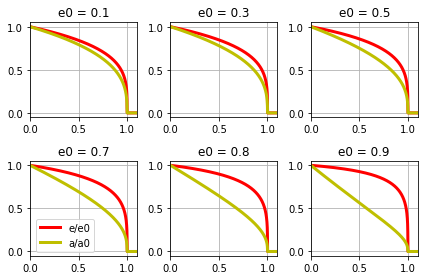

In [171]:

a0 = 10.*2.
N = 100000
fig = plt.figure()


es = [0.1,0.3,0.5,0.7,0.8,0.9]
nums = [231,232,233,234,235,236]
for i in range(len(es)):
    e0 = es[i]
    ax = fig.add_subplot(nums[i])
    plt.title('e0 = ' + str(e0))
    sol,t = evolve(a0,e0,a0**3./B,1e-5,N)
    try:
        tcol = t[np.where(sol[:,0]==0.)[0][0]]
    except:
        tcol = t[-1]
    ax.plot(t/tcol,sol[:,1]/e0,'r',label='e/e0',lw=3)
    ax.plot(t/tcol,sol[:,0]/a0,'y',label='a/a0',lw=3)
    plt.xlim(0.,1.1)
    plt.grid()

fig.legend(['e/e0','a/a0'],bbox_to_anchor=(0.23,0.23))
fig.tight_layout()
plt.savefig('different_e.png',bbox_inches='tight')



In [172]:
N = 10000
es = np.linspace(0.01,.99)
tcols = np.zeros(len(es))
for i in range(len(es)):
    e0 = es[i]
    y,t = evolve(a0,e0,2*a0**3.,1e-5,N)
    try:
        tcols[i] = t[np.where(y[:,0]==0.)[0][0]]
    except:
        tcols[i] = t[-1]

esrem = es

0.1667 [-3.66809637e-03  6.23914460e-09] False
0.1664 [-1.65233156e-03  4.96771109e-09] False
0.1659 [-0.00351616 -0.00041363] False
0.1651 [-1.72058999e-03  6.48277412e-09] False
0.164 [-1.66419337e-03 -3.64302826e-09] False
0.1627 [-0.00154237  0.00024195] False
0.1611 [-0.00184179 -0.00011518] False
0.1593 [-0.00176325 -0.00013289] False
0.1572 [-0.00151149 -0.00021424] False
0.1549 [nan nan] False
0.1523 [-0.00156168 -0.00031554] False
0.1495 [-1.47123765e-03 -7.87786410e-05] False
0.1465 [-2.48344291e-03 -5.18790218e-09] False
0.1432 [-8.09515538e-04  6.25444272e-09] False
0.1398 [-1.08748689e-03  5.56092772e-09] False
0.1361 [-1.20020610e-03 -1.78762399e-09] False
0.1323 [-0.00160734 -0.00055858] False
0.1282 [-0.00110995 -0.00026437] False
0.124 [-0.00104166 -0.00017824] False
0.1197 [-0.00414531 -0.00033171] False
0.1151 [-1.88221007e-04 -8.86933540e-05] False
0.1105 [-0.00111582  0.00031585] False
0.1057 [-0.00150729 -0.00012499] False
0.1008 [-6.26354711e-04  6.51208000e-09] 

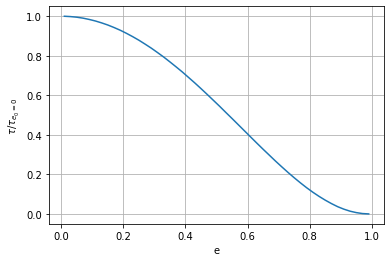

In [173]:

plt.plot(es,tcols/tcols[0])
plt.xlabel('e')
plt.ylabel(r'$\tau/\tau_{e_0=0}$')
plt.grid()
plt.savefig('collapseT.png',bbox_inches='tight')


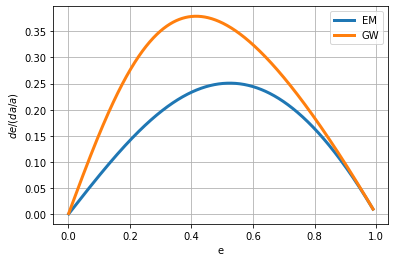

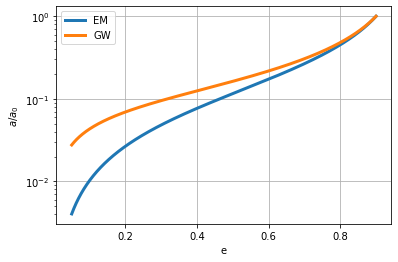

In [3]:
# New approach da/de:

e = np.linspace(0.001,.99,1000)
fEM = lambda e: 3.*e*(1.-e**2.)/(4.*(1.+e**2./2.))
fGW = lambda e: 19.*e*(1.-e**2.)*(1.+(121./304.)*e**2.)/(12.*(1.+(73./24.)*e**2. + (37./96.)*e**4))
plt.plot(e,fEM(e),label='EM',lw=3)
plt.plot(e,fGW(e),ms=1,label='GW',lw=3)
plt.ylabel(r'$de/(da/a)$')
plt.xlabel('e')
plt.legend()
plt.grid()
plt.savefig('deda.png',bbox_inches='tight')

fig = plt.figure()
g = lambda e: e**(4./3.)/(1.-e**2.)
gwg = lambda e: e**(12./19.)*(1.+121.*e**2./304.)**(870./2299.)/(1.-e**2.)

#Set e0 = 0.9 for comparison with numerics
e0 = 0.9
    
e = np.linspace(0.05,e0,10000)
plt.semilogy(e,g(e)/g(e0),lw=3)
plt.semilogy(e,gwg(e)/gwg(e0),lw=3)

plt.ylabel(r'$a/a_0$')
plt.xlabel('e')

#plt.semilogy(sol[:,1],sol[:,0]/a0,'--r',lw=2)
#abels = ['EM','GW']
#plt.xlim(0.02,0.9)
#plt.ylim(0.025,1.1)
plt.legend(labels,loc='best')
plt.grid()

plt.savefig('aofe.png',bbox_inches='tight')



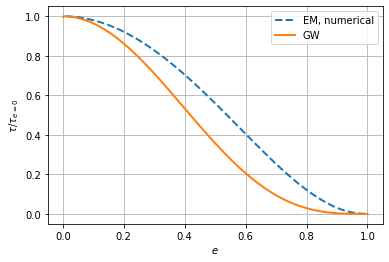

In [175]:
e = np.linspace(0.001,1.,1000)
#dimtim = lambda e0: 2.*(1./np.sqrt(1.-e0**2.) - 1.)/g(e0)**3.

dimtimGW = lambda e0: (48./19.)*solve_ivp(lambda e,y: gwg(e)**4.*(1.-e**2.)**(5./2.)/ (e*(1.+121.*e**2./304.)) , [0.0001,e0],[0.,] ).y[-1][-1] /gwg(e0)**4.

GWtaus = np.zeros(len(e))
for i in range(len(e)):
    GWtaus[i] = dimtimGW(e[i])

#plt.plot(e,dimtim(e),label='EM',lw=2)
plt.plot(esrem,tcols/tcols[0],'--',label='EM, numerical',lw=2)
plt.plot(e,GWtaus,label='GW',lw=2)
plt.legend(loc='best')
plt.xlabel('$e$')
plt.ylabel(r'$\tau/\tau_{e=0}$')
plt.grid()
plt.savefig('tauofe.png',bbox_inches='tight')